In [49]:
#import libraries
import pandas as pd
import numpy as np
import pickle
import catboost as cb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import RFE


In [50]:
#load data
train = pd.read_pickle('data/train.pkl')
test = pd.read_pickle('data/test.pkl')
validation = pd.read_pickle('data/smote_val1.pkl')

In [51]:
#split X and y
X_train = train.drop('fraud_bool', axis=1)
y_train = train['fraud_bool']
X_validation = validation.drop('fraud_bool', axis=1)
y_validation = validation['fraud_bool']
X_test = test.drop('fraud_bool', axis=1)
y_test = test['fraud_bool'] 

In [52]:
#y_train value counts
print(y_train.value_counts())

fraud_bool
False    786838
True       8151
Name: count, dtype: int64


In [53]:
selected_features = ['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age',
       'intended_balcon_amount', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'income_to_credit_limit',
       'days_since_request', 'zip_count_4w', 'proposed_credit_limit',
       'payment_type_AA', 'payment_type_AB', 'payment_type_AC',
       'payment_type_AD', 'employment_status_CA', 'employment_status_CB',
       'employment_status_CC', 'employment_status_CD', 'employment_status_CE',
       'employment_status_CF', 'housing_status_BA', 'housing_status_BB',
       'housing_status_BC', 'housing_status_BD', 'housing_status_BE',
       'source_INTERNET', 'device_os_linux', 'device_os_macintosh',
       'device_os_other', 'device_os_windows', 'device_os_x11']
X_train = X_train[selected_features]
X_validation = X_validation[selected_features]
X_test = X_test[selected_features]

In [54]:
"""import optuna

def objective(trial):
    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        "eval_metric": "F1",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    model = cb.CatBoostClassifier(**param)
    model.fit(X_train, y_train, eval_set=(X_validation, y_validation), silent=True, early_stopping_rounds=100)
    accuracy = model.score(X_validation, y_validation)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)

best_params = study.best_params"""

'import optuna\n\ndef objective(trial):\n    param = {\n        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),\n        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1, log=True),\n        "depth": trial.suggest_int("depth", 1, 12),\n        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),\n        "bootstrap_type": trial.suggest_categorical(\n            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]\n        ),\n        "eval_metric": "F1",\n    }\n\n    if param["bootstrap_type"] == "Bayesian":\n        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)\n    elif param["bootstrap_type"] == "Bernoulli":\n        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)\n\n    model = cb.CatBoostClassifier(**param)\n    model.fit(X_train, y_train, eval_set=(X_validation, y_validation), silent=True, early_stopping_rounds=100)\n    accuracy = model

In [55]:
#best_params = study.best_params
#print(best_params)

In [56]:
params = {
    "eval_metric": "AUC:hints=skip_train~false",
    'objective': 'Logloss',
    'colsample_bylevel': 0.08150317394086432,
    'depth': 11,
    'boosting_type': 'Plain',
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.756888725405805,
    'iterations': 2000}

model = cb.CatBoostClassifier(**params)
model.fit(X_train, y_train, eval_set=(X_validation, y_validation), early_stopping_rounds=50)

Learning rate set to 0.121997
0:	learn: 0.6218827	test: 0.6406685	best: 0.6406685 (0)	total: 79.2ms	remaining: 2m 38s
1:	learn: 0.7921626	test: 0.8361191	best: 0.8361191 (1)	total: 257ms	remaining: 4m 16s
2:	learn: 0.7835904	test: 0.8374951	best: 0.8374951 (2)	total: 345ms	remaining: 3m 49s
3:	learn: 0.7933772	test: 0.8489942	best: 0.8489942 (3)	total: 453ms	remaining: 3m 46s
4:	learn: 0.8424051	test: 0.8877373	best: 0.8877373 (4)	total: 1.16s	remaining: 7m 44s
5:	learn: 0.8579648	test: 0.8961729	best: 0.8961729 (5)	total: 1.32s	remaining: 7m 19s
6:	learn: 0.8683500	test: 0.8996800	best: 0.8996800 (6)	total: 1.98s	remaining: 9m 23s
7:	learn: 0.8648609	test: 0.8972249	best: 0.8996800 (6)	total: 2.08s	remaining: 8m 36s
8:	learn: 0.8756526	test: 0.9014548	best: 0.9014548 (8)	total: 2.75s	remaining: 10m 7s
9:	learn: 0.8823765	test: 0.9033309	best: 0.9033309 (9)	total: 3.39s	remaining: 11m 14s
10:	learn: 0.8941569	test: 0.9075944	best: 0.9075944 (10)	total: 4.12s	remaining: 12m 24s
11:	lear

In [57]:
def evaluate(predictions, FPR = [0.01, 0.05]):
    fprs, tprs, thresholds = roc_curve(y_test, predictions)
    plot_roc(fprs, tprs)
    print("AUC:", roc_auc_score(y_test, predictions))
    for fpr in FPR:
        tpr = tprs[fprs<fpr][-1]
        fpr = fprs[fprs<fpr][-1]
        threshold = thresholds[fprs<fpr][-1]
        to_pct = lambda x: str(round(x, 4) * 100) + "%"
        print("TPR: ", to_pct(tpr), "\nFPR: ", to_pct(fpr), "\nThreshold: ", round(threshold, 2))

def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, label='ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend()
    plt.show()

In [58]:
feature_importances = model.get_feature_importance()
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                             Feature  Importance
22                days_since_request    4.695904
1              name_email_similarity    4.572753
3       current_address_months_count    4.545358
7                       velocity_24h    4.311254
23                      zip_count_4w    4.215722
18         session_length_in_minutes    4.137494
0                             income    4.042528
19                keep_alive_session    4.024435
5             intended_balcon_amount    3.989933
8                        velocity_4w    3.965626
44                 device_os_windows    3.954649
6                        velocity_6h    3.895844
12                     email_is_free    3.686418
13                  phone_home_valid    3.459942
9               bank_branch_count_8w    3.429854
15                 bank_months_count    3.121276
10  date_of_birth_distinct_emails_4w    3.031073
35                 housing_status_BA    2.889771
21            income_to_credit_limit    2.859009
4                   

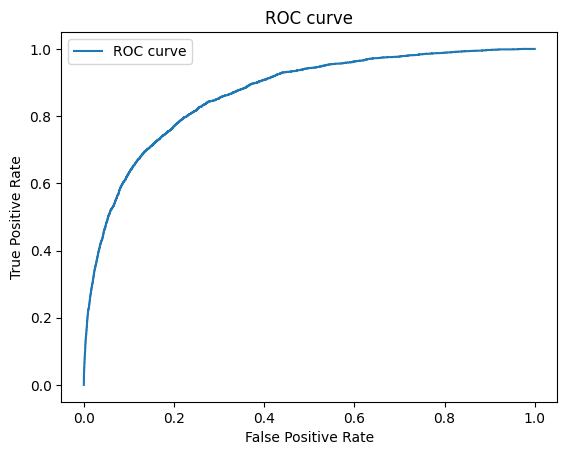

AUC: 0.8679607850928636
TPR:  22.38% 
FPR:  1.0% 
Threshold:  0.01
TPR:  48.16% 
FPR:  4.97% 
Threshold:  0.0


In [59]:
#test model on accuracy
predictions = model.predict_proba(X_test)[:,1]
evaluate(predictions)

In [40]:
#save model
#pickle.dump(model, open('cb_model.pkl', 'wb'))


In [9]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Use RFECV to find the optimal number of features
cv = StratifiedKFold(n_splits=5)
selector = RFECV(estimator=model, step=1, cv=cv, scoring='accuracy', n_jobs=-1)
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]
print("Best Number of Features:", selector.n_features_)
print("Selected Features:", selected_features)

# Update X_train, X_validation, and X_test to only include selected features
X_train = X_train[selected_features]
X_validation = X_validation[selected_features]
X_test = X_test[selected_features]

Learning rate set to 0.017969
0:	learn: 0.7612563	total: 41ms	remaining: 1m 21s
1:	learn: 0.7794942	total: 59.7ms	remaining: 59.7s
2:	learn: 0.8073522	total: 94.1ms	remaining: 1m 2s
3:	learn: 0.8205890	total: 142ms	remaining: 1m 10s
4:	learn: 0.8216935	total: 196ms	remaining: 1m 18s
5:	learn: 0.8210459	total: 253ms	remaining: 1m 23s
6:	learn: 0.8209263	total: 310ms	remaining: 1m 28s
7:	learn: 0.8194302	total: 343ms	remaining: 1m 25s
8:	learn: 0.8187902	total: 388ms	remaining: 1m 25s
9:	learn: 0.8199742	total: 395ms	remaining: 1m 18s
10:	learn: 0.8161545	total: 406ms	remaining: 1m 13s
11:	learn: 0.8139595	total: 461ms	remaining: 1m 16s
12:	learn: 0.8177680	total: 511ms	remaining: 1m 18s
13:	learn: 0.8202551	total: 561ms	remaining: 1m 19s
14:	learn: 0.8196572	total: 570ms	remaining: 1m 15s
15:	learn: 0.8168868	total: 589ms	remaining: 1m 12s
16:	learn: 0.8174562	total: 628ms	remaining: 1m 13s
17:	learn: 0.8185681	total: 684ms	remaining: 1m 15s
18:	learn: 0.8178774	total: 691ms	remaining: 